In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import os
import dask.dataframe as dd
from random import randint
import numpy as np
from dask.array import from_array as fa

from dask_jobqueue import SLURMCluster
from dask.distributed import Client
import math

cluster = SLURMCluster() #add arguments if want a cluster outside of the set up defult
cluster = SLURMCluster(cores=24, processes=6, walltime="5:00:00", queue="compute", memory= "120GB")

/home/dougfe/miniconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44449 instead
  warnings.warn(


In [2]:

cluster.scale(jobs=2)

In [3]:
client = Client(cluster)
client


Client Scheduler: tcp://10.22.255.60:39531 Dashboard: http://10.22.255.60:44449/status,Cluster Workers: 12 Cores: 48 Memory: 240.00 GB


In [15]:
sourceFile = '_1week.csv'
df = dd.read_csv(sourceFile, dtype = 'object', low_memory=False, error_bad_lines=False)
#df = dd.read_parquet(sourceFile)  # For if you're smart and use parquet files instead of csvs

In [16]:

pd.set_option('display.max.columns', None)
pd.set_option('display.width', 150)
print(df.shape,'\n\n')
print(df.head(),'\n\n')
df.describe()


(Delayed('int-f4178a48-1e7b-4953-a4e1-866a05f2087f'), 76) 


  Unnamed: 0  JobIDRaw   step           JobID  UID  GID AssocID Cluster JobName User Group Account Reservation ReservationId Partition  QOS QOSRAW  \
0          0  33558654  batch  33558654.batch  NaN  NaN    7461   comet   batch  NaN   NaN  uic342         NaN           NaN       NaN  NaN    NaN   
1          1  33558658  batch  33558658.batch  NaN  NaN    7461   comet   batch  NaN   NaN  uic342         NaN           NaN       NaN  NaN    NaN   
2          2  33558659  batch  33558659.batch  NaN  NaN    7461   comet   batch  NaN   NaN  uic342         NaN           NaN       NaN  NaN    NaN   
3          3  33558661  batch  33558661.batch  NaN  NaN    7461   comet   batch  NaN   NaN  uic342         NaN           NaN       NaN  NaN    NaN   
4          4  33558686  batch  33558686.batch  NaN  NaN    7461   comet   batch  NaN   NaN  uic342         NaN           NaN       NaN  NaN    NaN   

  NNODES NTASKS NCPUS AllocCPUS ReqCPU

,Unnamed: 0,JobIDRaw,step,JobID,UID,GID,AssocID,Cluster,JobName,User,Group,Account,Reservation,ReservationId,Partition,QOS,QOSRAW,NNODES,NTASKS,NCPUS,AllocCPUS,ReqCPUS,ReqCPUFreq,ReqMem,ReqGRES,AllocGRES,Timelimit,Priority,State,ExitCode,DerivedExitCode,Submit,Eligible,Start,End,Time,Elapsed,Reserved,Suspended,AveCPU,MinCPU,MinCPUNode,MinCPUTask,ResvCPU,ResvCPURaw,TotalCPU,SystemCPU,UserCPU,CPUTime,CPUTimeRaw,AveCPUFreq,AveDiskRead,MaxDiskRead,MaxDiskReadNode,MaxDiskReadTask,AveDiskWrite,MaxDiskWrite,MaxDiskWriteNode,MaxDiskWriteTask,AvePages,MaxPages,MaxPagesNode,MaxPagesTask,AveRss,MaxRSS,MaxRSSNode,MaxRSSTask,AveVMSize,MaxVMSize,MaxVMSizeNode,MaxVMSizeTask,ConsumedEnergy,ConsumedEnergyRaw,Layout,Comment,NodeList
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [17]:
# Get info on single account usage
userDF = df.loc[df['Account'] == 'csd450']
print(userDF[['Account', 'JobIDRaw', 'JobName', 'State', 'ExitCode', 'Start', 'End']])

Dask DataFrame Structure:
              Account JobIDRaw JobName   State ExitCode   Start     End
npartitions=2                                                          
               object   object  object  object   object  object  object
                  ...      ...     ...     ...      ...     ...     ...
                  ...      ...     ...     ...      ...     ...     ...
Dask Name: getitem, 10 tasks


In [22]:
# Get info on multiple account usage

accountList = ['mit178', 'dku133', 'cla176']

queryDF = df.loc[df['Account'].isin(accountList)]
#print(userDF[['Account', 'JobIDRaw', 'JobName', 'State', 'ExitCode', 'Start']].compute())

In [23]:
newquery = queryDF.compute().sort_values('Start', ascending=False)

In [24]:
#queryDF = df
queryDF.head(50)

,Unnamed: 0,JobIDRaw,step,JobID,UID,GID,AssocID,Cluster,JobName,User,Group,Account,Reservation,ReservationId,Partition,QOS,QOSRAW,NNODES,NTASKS,NCPUS,AllocCPUS,ReqCPUS,ReqCPUFreq,ReqMem,ReqGRES,AllocGRES,Timelimit,Priority,State,ExitCode,DerivedExitCode,Submit,Eligible,Start,End,Time,Elapsed,Reserved,Suspended,AveCPU,MinCPU,MinCPUNode,MinCPUTask,ResvCPU,ResvCPURaw,TotalCPU,SystemCPU,UserCPU,CPUTime,CPUTimeRaw,AveCPUFreq,AveDiskRead,MaxDiskRead,MaxDiskReadNode,MaxDiskReadTask,AveDiskWrite,MaxDiskWrite,MaxDiskWriteNode,MaxDiskWriteTask,AvePages,MaxPages,MaxPagesNode,MaxPagesTask,AveRss,MaxRSS,MaxRSSNode,MaxRSSTask,AveVMSize,MaxVMSize,MaxVMSizeNode,MaxVMSizeTask,ConsumedEnergy,ConsumedEnergyRaw,Layout,Comment,NodeList
1908,1908,33783628,batch,33783628.batch,NaN,NaN,15294,comet,batch,NaN,NaN,cla176,NaN,NaN,NaN,NaN,NaN,1,1,24,24,24,0,120Gn,NaN,NaN,NaN,NaN,COMPLETED,0:0,NaN,2020-06-01T00:00:00,2020-06-01T00:00:00,2020-06-01T00:00:00,2020-06-02T02:16:43,NaN,1-02:16:43,INVALID,00:00:00,29-11:54:32,29-11:54:32,comet-19-37,0.0,INVALID,NaN,29-12:01:26,06:10:05,29-05:51:21,26-06:41:12,2270472,801K,673780M,673780M,comet-19-37,0.0,474021M,474021M,comet-19-37,0.0,240K,240K,comet-19-37,0.0,5406060K,5450492K,comet-19-37,0.0,8369032K,9574784K,comet-19-37,0.0,0.0,0.0,Unknown,NaN,comet-19-37
3021,3021,33796528,batch,33796528.batch,NaN,NaN,15294,comet,batch,NaN,NaN,cla176,NaN,NaN,NaN,NaN,NaN,1,1,24,24,24,0,120Gn,NaN,NaN,NaN,NaN,COMPLETED,0:0,NaN,2020-06-01T00:00:00,2020-06-01T00:00:00,2020-06-01T00:00:00,2020-06-01T23:44:00,NaN,23:44:00,INVALID,00:00:00,24-11:26:59,24-11:26:59,comet-21-72,0.0,INVALID,NaN,24-11:35:14,07:01:48,24-04:33:26,23-17:36:00,2050560,1.37M,1010147M,1010147M,comet-21-72,0.0,524600M,524600M,comet-21-72,0.0,233K,233K,comet-21-72,0.0,7.29G,7769148K,comet-21-72,0.0,9774844K,10751592K,comet-21-72,0.0,0.0,0.0,Unknown,NaN,comet-21-72
4196,4196,33804402,batch,33804402.batch,NaN,NaN,15294,comet,batch,NaN,NaN,cla176,NaN,NaN,NaN,NaN,NaN,1,1,24,24,24,0,120Gn,NaN,NaN,NaN,NaN,COMPLETED,0:0,NaN,2020-06-01T00:00:00,2020-06-01T00:00:00,2020-06-01T00:00:00,2020-06-02T09:33:13,NaN,1-09:33:13,INVALID,00:00:00,21-13:47:36,21-13:47:36,comet-18-37,0.0,INVALID,NaN,21-13:49:01,02:40:16,21-11:08:44,33-13:17:12,2899032,650K,276406M,276406M,comet-18-37,0.0,235832M,235832M,comet-18-37,0.0,252K,252K,comet-18-37,0.0,3092388K,3291644K,comet-18-37,0.0,6512000K,7965236K,comet-18-37,0.0,0.0,0.0,Unknown,NaN,comet-18-37
4197,4197,33804405,batch,33804405.batch,NaN,NaN,15294,comet,batch,NaN,NaN,cla176,NaN,NaN,NaN,NaN,NaN,1,1,12,12,12,0,5Gc,NaN,NaN,NaN,NaN,COMPLETED,0:0,NaN,2020-06-01T00:00:00,2020-06-01T00:00:00,2020-06-01T00:00:00,2020-06-01T04:46:00,NaN,04:46:00,INVALID,00:00:00,2-05:50:28,2-05:50:28,comet-02-13,0.0,INVALID,NaN,2-05:54:27,11:33.433,2-05:42:53,2-09:12:00,205920,11.29M,102065M,102065M,comet-02-13,0.0,55944M,55944M,comet-02-13,0.0,231K,231K,comet-02-13,0.0,1257692K,1324236K,comet-02-13,0.0,2933764K,3259124K,comet-02-13,0.0,0.0,0.0,Unknown,NaN,comet-02-13
4198,4198,33804407,batch,33804407.batch,NaN,NaN,15294,comet,batch,NaN,NaN,cla176,NaN,NaN,NaN,NaN,NaN,1,1,12,12,12,0,5Gc,NaN,NaN,NaN,NaN,COMPLETED,0:0,NaN,2020-06-01T00:00:00,2020-06-01T00:00:00,2020-06-01T00:00:00,2020-06-01T06:17:42,NaN,06:17:42,INVALID,00:00:00,2-22:50:00,2-22:50:00,comet-06-52,0.0,INVALID,NaN,2-22:50:24,16:46.407,2-22:33:38,3-03:32:24,271944,4.73M,133830M,133830M,comet-06-52,0.0,77385M,77385M,comet-06-52,0.0,0,0,comet-06-52,0.0,1561900K,1563476K,comet-06-52,0.0,3211028K,3614308K,comet-06-52,0.0,0.0,0.0,Unknown,NaN,comet-06-52
4199,4199,33804408,batch,33804408.batch,NaN,NaN,15294,comet,batch,NaN,NaN,cla176,NaN,NaN,NaN,NaN,NaN,1,1,12,12,12,0,5Gc,NaN,NaN,NaN,NaN,COMPLETED,0:0,NaN,2020-06-01T00:00:00,2020-06-01T00:00:00,2020-06-01T00:00:00,2020-06-01T06:52:30,NaN,06:52:30,INVALID,00:00:00,3-05:03:48,3-05:03:48,comet-10-49,0.0,INVALID,NaN,3-05:06:57,18:48.096,3-04:48:09,3-10:30:00,297000,12.41M,145345M,145345M,comet-10-49,0.0,80993M,80993M,comet-10-49,0.0,226K,226K,comet-10-49,0.0,16

In [7]:

for orig in queryDF['MaxRSS']:
    if (type(orig) != int) and (type(orig) != float):
        if (orig[-1] == "K"):
            num = float(orig[0 : -1])
            queryDF["MaxRSS"] = queryDF["MaxRSS"].replace(orig, num)
        elif (orig[-1] == "M"):
            num = float(orig[0 : -1]) * 1024
            queryDF["MaxRSS"] = queryDF["MaxRSS"].replace(orig, num)
        elif (orig[-1] == "G"):
            num = float(orig[0 : -1]) * 1024 * 1024
            queryDF["MaxRSS"] = queryDF["MaxRSS"].replace(orig, num)
        elif (orig == ""):
            queryDF["MaxRSS"] = queryDF["MaxRSS"].replace(orig, 0.0)
    
      

In [ ]:
for ori, core in zip(queryDF['ReqMem'], queryDF["NCPUS"]):
    if (type(ori) != int) and (type(ori) != float):
        if (ori[-1] == "n"):
            if (ori[-2] == "K"):
                num = float(ori[0 : -2])
                queryDF["ReqMem"] = queryDF["ReqMem"].replace(ori, num)
            elif (ori[-2] == "M"):
                num = float(orig[0 : -2]) * 1024
                queryDF["ReqMem"] = queryDF["ReqMem"].replace(ori, num)
            elif (ori[-2] == "G"):
                num = float(orig[0 : -2]) * 1024 * 1024
                queryDF["ReqMem"] = queryDF["ReqMem"].replace(ori, num)
        elif (ori == ""):
                queryDF["ReqMem"] = queryDF["ReqMem"].replace(ori, 0.0)
        elif (ori[-1] == "c"):
            if (ori[-2] == "K"):
                num = float(ori[0 : -2]) * float(core)
                queryDF["ReqMem"] = queryDF["ReqMem"].replace(ori, num)
            elif (ori[-2] == "M"):
                num = float(orig[0 : -2]) * 1024 * float(core)
                queryDF["ReqMem"] = queryDF["ReqMem"].replace(ori, num)
            elif (ori[-2] == "G"):
                num = float(orig[0 : -2]) * 1024 * 1024 * float(core)
                queryDF["ReqMem"] = queryDF["ReqMem"].replace(ori, num)



In [8]:
pd.set_option("display.max.rows", 100)
queryDF['MaxRSS']=queryDF['MaxRSS'].astype(float)
#queryDF['ReqMem']=queryDF['ReqMem'].astype(float)

#queryDF.dtypes

In [9]:
# This just cleans and speeds up plotting process
queryDF = queryDF.loc[queryDF['MaxRSS'] < 200000000]
queryDF = queryDF.loc[queryDF['MaxRSS'] > 0]
#queryDF = queryDF.loc[queryDF['ReqMem'] < 200000000]
#queryDF = queryDF.loc[queryDF['ReqMem'] > 0]


In [18]:
# Run mem query to see number of jobs in dataset greater than input var
memQVal = 5000000
len(queryDF.query('MaxRSS > ' + str(memQVal)))

688

In [11]:
queryDF = queryDF.compute()
#queryDF.head()

In [ ]:
# Produce bin limits list for plotting

binLims = [0]
limInt = 10000000
while limInt <= 200000000:
    binLims.append(limInt)
    limInt+=10000000
    
print(binLims)

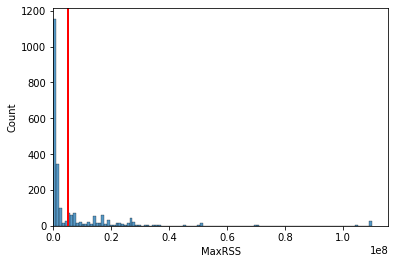

In [12]:
# Normally graphing mem data
plot1 = sns.histplot(data=queryDF, x = 'MaxRSS')
plt.xlim(0)
plt.axvline(x=5000000, ymin=0,ymax=1,linewidth=2, color='r')
plt.show()


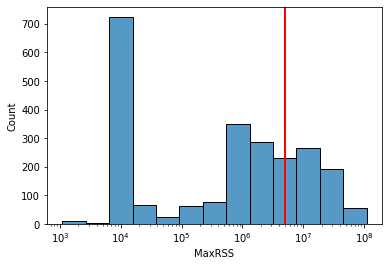

In [13]:
# Graphing histplot with log x axis and scaling bin sizes
mainPlot = sns.histplot(data=queryDF, x="MaxRSS", log_scale = True)
plt.axvline(x=5000000, ymin=0,ymax=1,linewidth=2, color='r')
plt.show()

<AxesSubplot:xlabel='MaxRSS', ylabel='Count'>

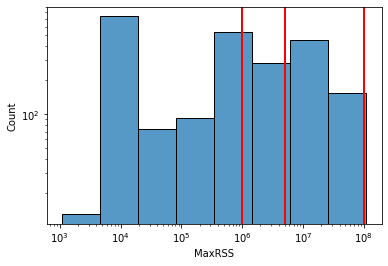

In [16]:
splot = sns.histplot(data=queryDF, x="MaxRSS", bins=8,log_scale = True)
splot.set(yscale="log")
plt.axvline(x=5000000, ymin=0,ymax=1,linewidth=2, color='r')
plt.axvline(x=1000000, ymin=0,ymax=1,linewidth=2, color='r')
plt.axvline(x=100000000, ymin=0,ymax=1,linewidth=2, color='r')
splot

<AxesSubplot:xlabel='MaxRSS', ylabel='Count'>

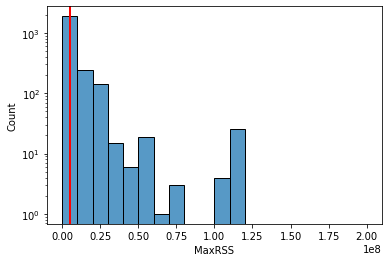

In [31]:
splot = sns.histplot(data=queryDF, x="MaxRSS",bins=binLims, log_scale = False)
splot.set(yscale="log")
plt.axvline(x=5000000, ymin=0,ymax=1,linewidth=2, color='r')
splot

In [92]:
# histogram zoom function. 
import math
def logYhistplot(xMin, xMax):
    plt.xlim(xMin, xMax)
    binNum = max(int(math.ceil(50*(120000000/(xMax-xMin)))),50)
    mplot = sns.histplot(data=queryDF, x="MaxRSS", bins = binNum, log_scale = False)
    mplot.set(yscale="log")
    plt.axvline(x=5000000, ymin=0,ymax=1,linewidth=2, color='r')
    plt.axvline(x=10000000, ymin=0,ymax=1,linewidth=2, color='r')
    plt.axvline(x=100000000, ymin=0,ymax=1,linewidth=2, color='r')
    
    plt.title('MaxRSS from ' + str(xMin/1000000) + ' GB to ' + str(xMax/1000000) + ' GB')

    mplot


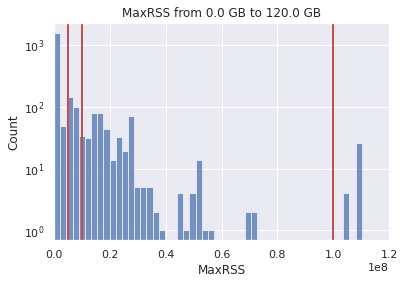

In [86]:
logYhistplot(0, 120000000)

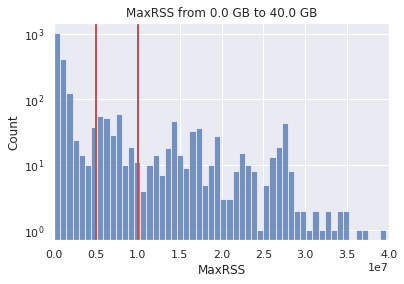

In [87]:
logYhistplot(0,40000000)

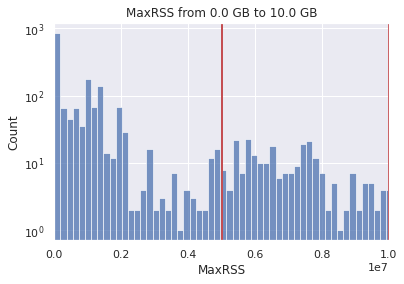

In [88]:
logYhistplot(0,10000000)

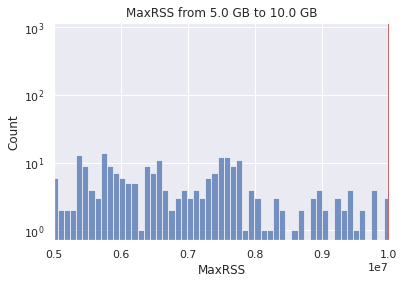

In [93]:
logYhistplot(5000000,10000000)

(array([1.246e+03, 3.290e+02, 2.900e+01, 1.900e+01, 6.400e+01, 8.100e+01,
        6.900e+01, 2.900e+01, 2.500e+01, 9.000e+00, 1.800e+01, 1.300e+01,
        3.700e+01, 4.200e+01, 1.300e+01, 6.600e+01, 8.000e+00, 3.500e+01,
        4.000e+00, 1.000e+01, 2.300e+01, 1.000e+01, 4.000e+00, 1.500e+01,
        4.900e+01, 2.200e+01, 3.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 1.300e+01, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

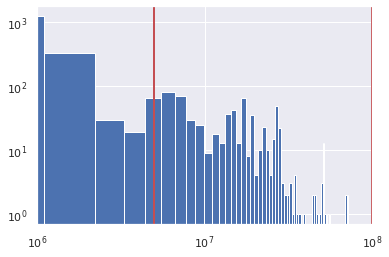

In [89]:
# Graphing node usage 
#plot1 = sns.histplot(data=queryDF, x="MaxRSS", bins = binNum, log_scale = False)
sns.set_theme()
plt.xscale('log')
plt.xlim(10**6,10**8)
plt.axvline(x=5000000, ymin=0,ymax=1,linewidth=2, color='r')
plt.axvline(x=1000000, ymin=0,ymax=1,linewidth=2, color='r')
plt.axvline(x=100000000, ymin=0,ymax=1,linewidth=2, color='r')
plt.hist(queryDF['MaxRSS'], log = True, bins = 100)

In [ ]:

queryDF.compute().describe()

In [19]:

# Query save system: If desired, users can save their current query as a parquet file for use later

saveName = 'sacctQuery'  # Doesn't need to include the .parqet or .csv extension
queryDF.to_parquet(saveName+'.parquet')